### Houses Price - Entendendo os Dados

<img src="houses-prices.png" alt="Imagem do houses Price" width="400">

*Objetivo:* É seu trabalho prever o preço de venda de cada casa. Para cada ID no conjunto de teste, você deve prever o valor da variável SalePrice. Como é necessário prever o preço de casas (uma variável contínua), se trata de um problema de regressão.


_Métricas a serem utilizadas_<br>
| Métrica                                   | Interpretação                                            |usar                                                 |
| ----------------------------------------- | -------------------------------------------------------- | ----------------------------------------------------------- |
| **MAE (Mean Absolute Error)**             | Erro médio absoluto (em unidades de preço)               |interpretar                                        |
| **RMSE (Root Mean Squared Error)**        | Erro quadrático médio — dá mais peso a erros grandes     | outliers                                           |
| **R² (R-Squared)**                        | Porcentagem da variância explicada pelo modelo           |geral                                             |
| **MAPE (Mean Absolute Percentage Error)** | Erro percentual médio — mostra o erro em % do valor real |


In [2]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Importando os dados
df_train = pd.read_csv('train.csv')

#### Estatística Descritiva

df_train

In [4]:
df_train.shape

(1460, 81)

In [5]:
# Preço
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
# Identificando a quantidade dos tipos de colunas
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

### Rascunho

Entendo os valores do Preço

<Axes: xlabel='SalePrice', ylabel='Count'>

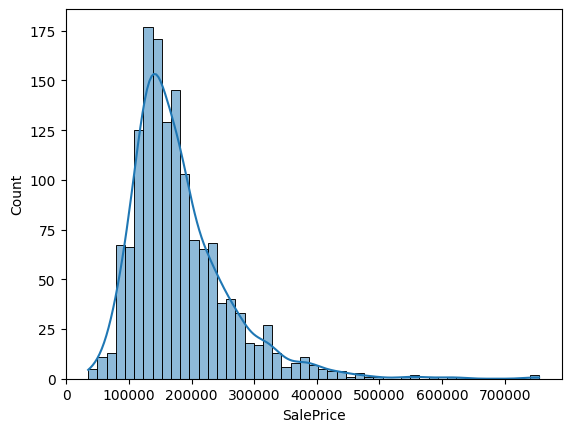

In [8]:
# Distribuição do Preço de Venda 
sns.histplot(df_train['SalePrice'], kde=True)

# Preços bem concentrados ente 15000 a 190000

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='MSSubClass', ylabel='count'>

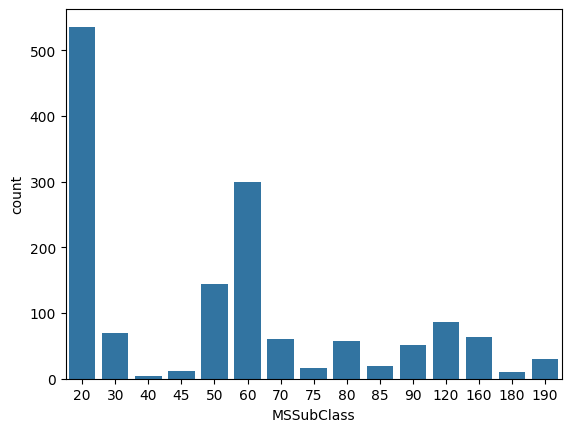

In [10]:
# Quantidade de casas por tipo de zona
sns.countplot(x='MSSubClass', data=df_train)

#Result: Quande quantidade de asa térrea (pós-1946, todos os estilos)

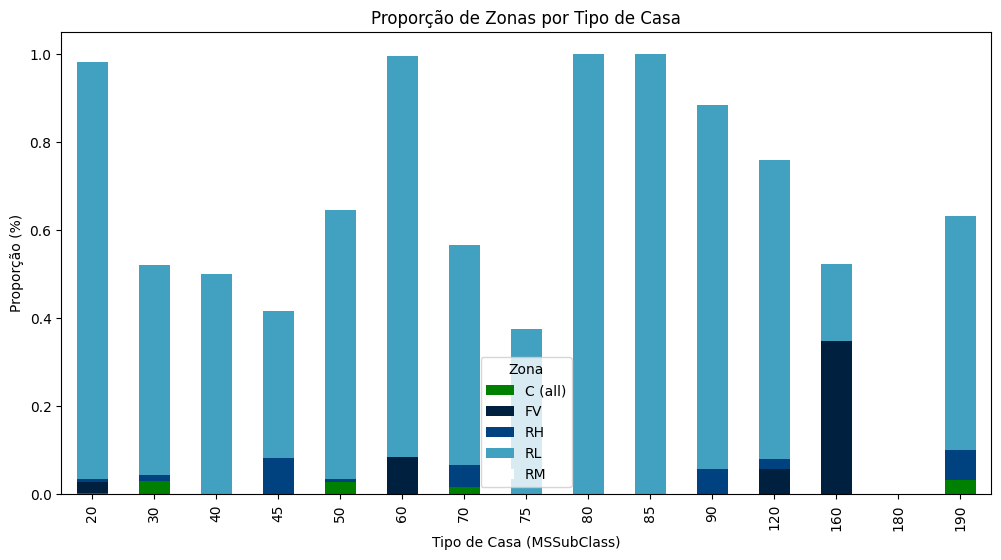

In [11]:
cross = pd.crosstab(df_train['MSSubClass'], df_train['MSZoning'], normalize='index')
cross.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='ocean')
plt.title("Proporção de Zonas por Tipo de Casa")
plt.xlabel("Tipo de Casa (MSSubClass)")
plt.ylabel("Proporção (%)")
plt.legend(title='Zona')

# A maioria de concentra em Residencial baixa densidade

<Axes: xlabel='MSZoning', ylabel='count'>

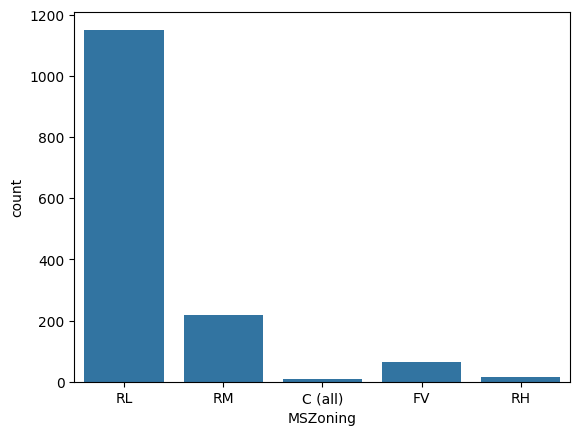

In [12]:
# Quantidade de casas por tipo de zona
sns.countplot(x='MSZoning', data=df_train)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

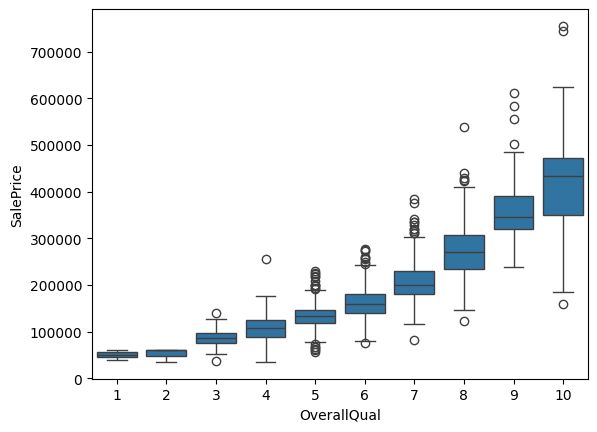

In [13]:
# Preço vs Qualidade Geral
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

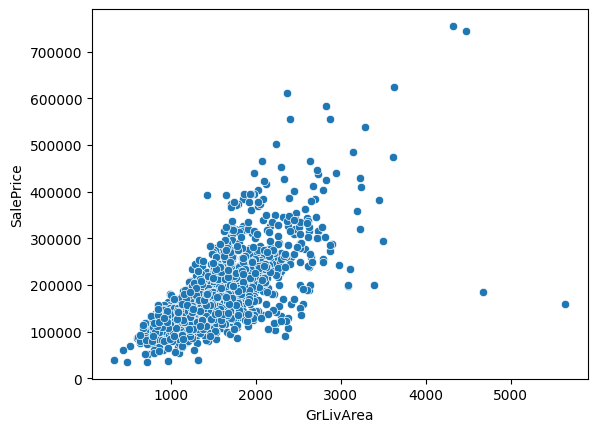

In [14]:
# Área construída vs Preço
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)

<Axes: ylabel='Neighborhood'>

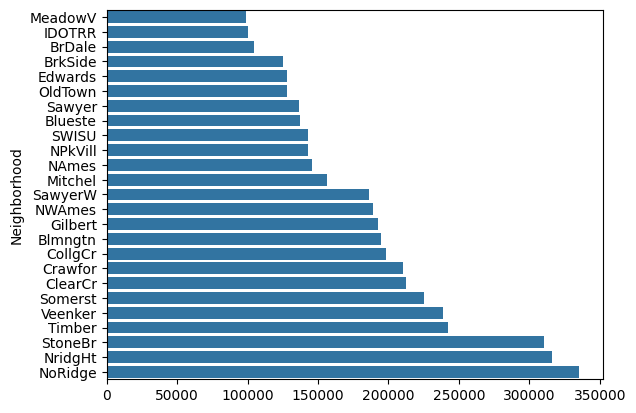

In [ ]:
# Média de preço por bairro
mean_prices = df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values()
sns.barplot(x=mean_prices.values, y=mean_prices.index)

<Axes: >

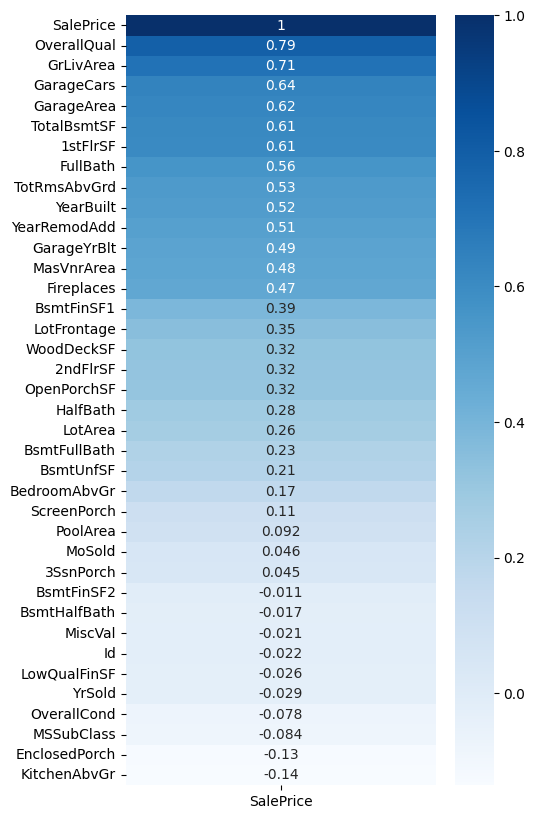

In [16]:
# Descobrir relações numéricas
plt.figure(figsize=(5, 10))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap="Blues")

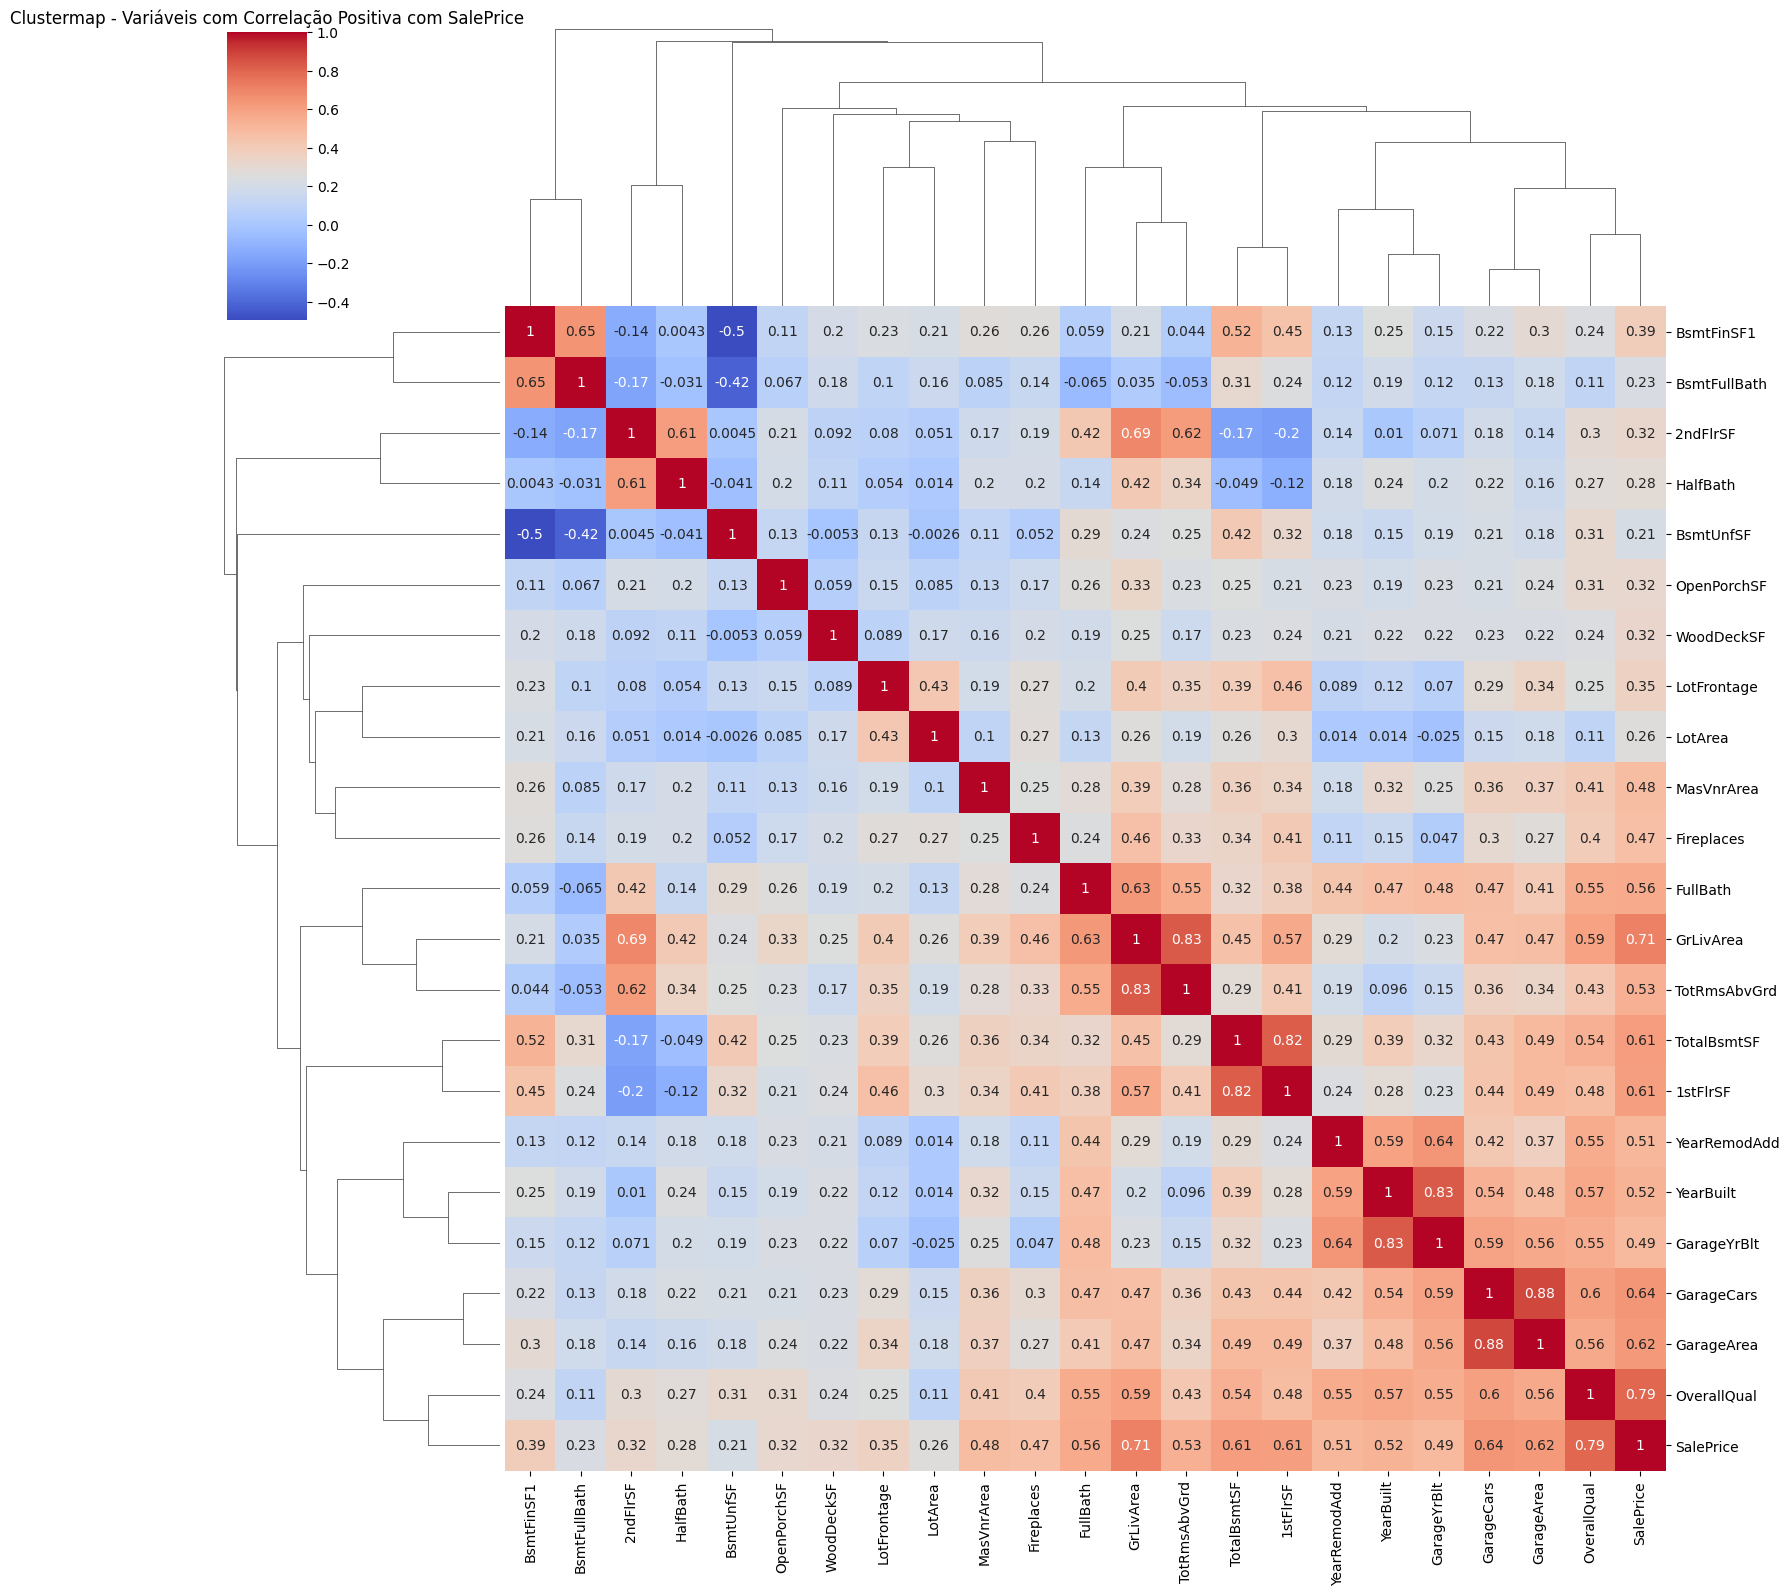

In [17]:
# 1. Calcular matriz de correlação
corr = df_train.corr(numeric_only=True)

# 2. Filtrar apenas variáveis com correlação positiva com SalePrice
positive_corr = corr['SalePrice'][corr['SalePrice'] > 0.2]

# 3. Pegar os nomes das colunas relevantes
selected_features = positive_corr.index.tolist()

# 4. Subset da matriz de correlação
filtered_corr = corr.loc[selected_features, selected_features]

# 5. Clustermap com essas variáveis
sns.clustermap(filtered_corr,
               cmap='coolwarm',
               annot=True,
               figsize=(16, 16))

plt.title("Clustermap - Variáveis com Correlação Positiva com SalePrice")
plt.show()

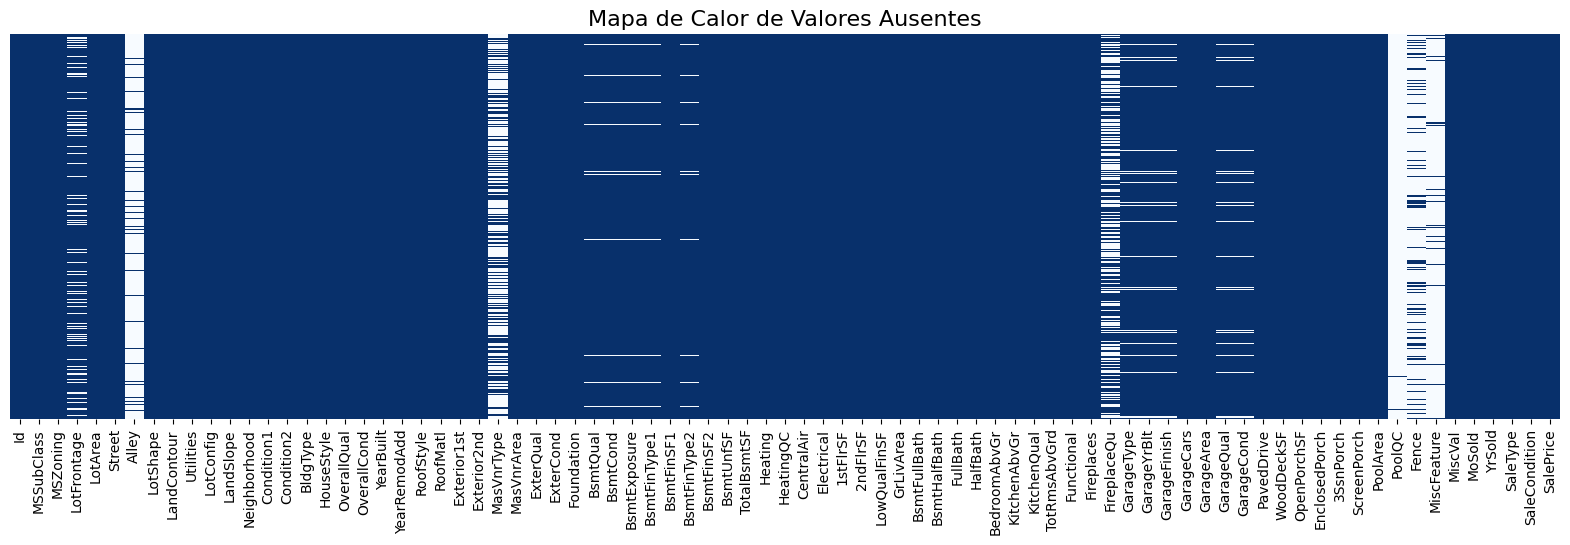

In [21]:
# Verificando valores ausentes
plt.figure(figsize=(20, 5))
sns.heatmap(df_train.isnull(), cbar=False, cmap='Blues_r', yticklabels=False)
plt.title('Mapa de Calor de Valores Ausentes', fontsize=16)
plt.show()